In [1287]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score


In [1288]:
# Charger le DataFrame à partir du fichier CSV
df = pd.read_csv('C:/Users/hamou/OneDrive/Bureau/Hackathon/marketing_campaign.csv', sep='\t')

In [1289]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [1290]:
# Supprimer les lignes avec des valeurs manquantes
df = df.dropna(axis=0, how='any')

In [ ]:
# Convertir toutes les valeurs de 'Marital_Status' en minuscules
df['Marital_Status'] = df['Marital_Status'].str.lower()

# Remplacer 'together' par 'married' et 'alone' par 'single'
df['Marital_Status'] = df['Marital_Status'].replace({'together': 'married', 'alone': 'single'})

# Supprimer les lignes avec 'absurd' ou 'yolo' dans 'Marital_Status'
df = df[~df['Marital_Status'].isin(['absurd', 'yolo'])]

# Encodage de la colonne 'Marital_Status' avec LabelEncoder
#0 représente "single" (célibataire),1 représente "married" (marié),2 représente"divorced" (divorcé),3 représente "widowed" (veuf ou veuve).
label_encoder = LabelEncoder()
df['Marital_Status'] = label_encoder.fit_transform(df['Marital_Status'])


'\n# Encodage de la colonne \'Marital_Status\' avec LabelEncoder\n#0 représente "single" (célibataire),1 représente "married" (marié),2 représente"divorced" (divorcé),3 représente "widowed" (veuf ou veuve).\nlabel_encoder = LabelEncoder()\ndf[\'Marital_Status\'] = label_encoder.fit_transform(df[\'Marital_Status\'])\n'

In [1292]:
# Convertir la colonne 'Dt_Customer' en datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

In [1293]:
# Calculer l'âge des clients
df['Customer_Age'] = (pd.to_datetime('today') - df['Dt_Customer']).dt.days // 365


# Calculer l'âge des clients (en années) à partir de 'Year_Birth'
df['Age'] = pd.to_datetime('today').year - df['Year_Birth']


In [1294]:

# Fonction pour supprimer les valeurs extrêmes sur une colonne
def remove_outliers_iqr(df, col_name):
    # Calcul des quartiles
    Q1 = df[col_name].quantile(0.25)
    Q3 = df[col_name].quantile(0.75)
    IQR = Q3 - Q1
    
    # Calcul des bornes
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filtrer les valeurs qui sont dans les bornes
    return df[(df[col_name] >= lower_bound) & (df[col_name] <= upper_bound)]

# Appliquer la fonction pour chaque colonne numérique
columns_to_check = ['Income']

for col in columns_to_check:
    df = remove_outliers_iqr(df, col)

In [1283]:
# Supprimer les colonnes inutiles
df = df.drop(columns=['Z_Revenue', 'Z_CostContact', 'ID', 'Complain','Year_Birth','Dt_Customer'])

In [1295]:
# Liste des colonnes liées aux campagnes acceptées
accepted_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

# Créer la nouvelle colonne 'NumAcceptedCmp' qui est la somme des valeurs des colonnes de campagnes acceptées
df['NumAcceptedCmp'] = df[accepted_columns].sum(axis=1)

In [1266]:
# Encodage des colonnes catégoriques avec LabelEncoder
label_encoder = LabelEncoder()
df['Marital_Status'] = label_encoder.fit_transform(df['Marital_Status'])
df['Education'] = label_encoder.fit_transform(df['Education'])


In [1267]:
# Liste des colonnes numériques à standardiser
columns_to_standardize = ['Income', 'Age','Customer_Age','NumWebVisitsMonth','NumStorePurchases','NumCatalogPurchases','NumWebPurchases','MntWines', 'MntMeatProducts', 'MntGoldProds','MntSweetProducts','NumDealsPurchases','MntFishProducts','MntFruits','Recency','Education','Marital_Status']

# Initialisation du standard scaler
scaler = StandardScaler()

# Appliquer la standardisation sur les colonnes spécifiées
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])

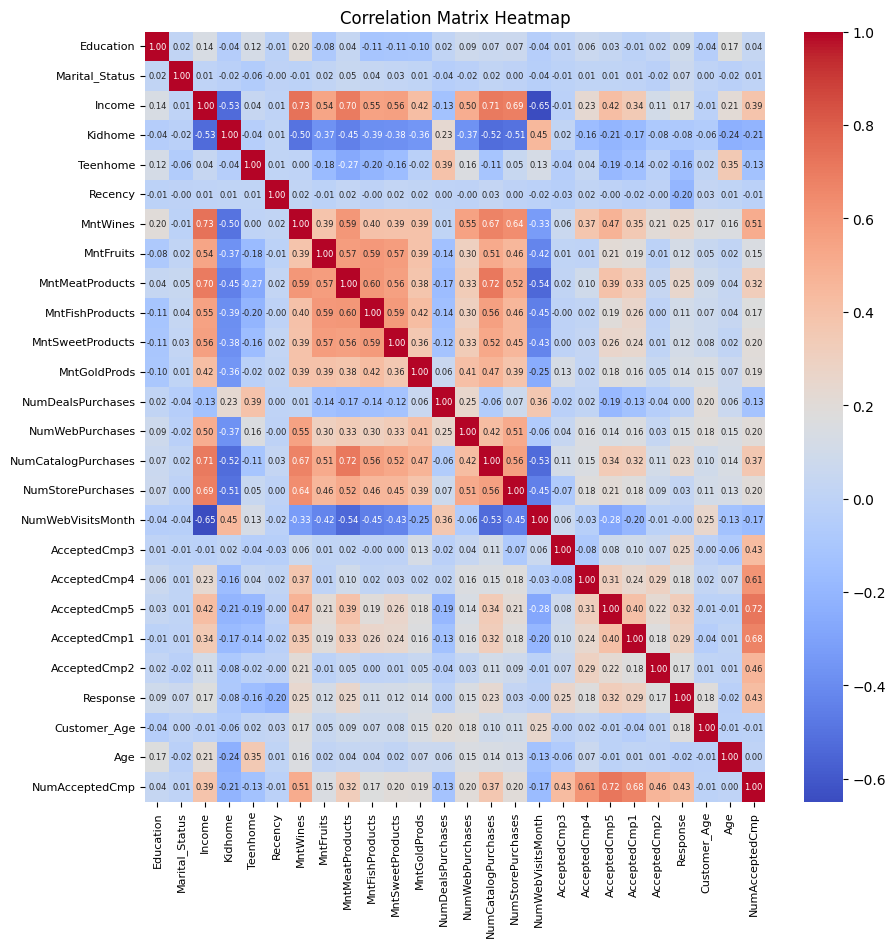

In [1268]:

# Calculer la matrice de corrélation
correlation_matrix = df.corr()

# Tracer la heatmap
# Tracer la heatmap avec une police plus petite
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, annot_kws={"size": 6})
plt.title('Correlation Matrix Heatmap')
plt.xticks(fontsize=(8))
plt.yticks(fontsize=(8))

plt.show()


In [1269]:
# Sauvegarder le DataFrame filtré dans un nouveau fichier CSV 'net.csv'
df.to_csv('C:/Users/hamou/OneDrive/Bureau/Hackathon/net.csv', index=False)

Random Forest

In [1270]:

# Charger le dataset
df = pd.read_csv('C:/Users/hamou/OneDrive/Bureau/Hackathon/net.csv')

# Liste des colonnes que vous voulez utiliser pour le modèle
selected_columns = ['MntWines', 'Income', 'MntGoldProds','Customer_Age', 'Recency','NumAcceptedCmp','MntMeatProducts']

# Sélectionner uniquement ces colonnes dans X
X = df[selected_columns]
y = df['Response']  # La colonne cible 'Response'

# Diviser les données en ensembles d'entraînement et de test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)




# Créer le modèle Random Forest avec des paramètres ajustés
rf = RandomForestClassifier(
    n_estimators=200,        # 200 arbres dans la forêt
    max_depth=15,            # Limiter la profondeur des arbres
    min_samples_split=14,    # Minimum d'échantillons requis pour diviser un nœud
    min_samples_leaf=8,      # Minimum d'échantillons dans une feuille
    max_features='sqrt',    # Utiliser la racine carrée du nombre de caractéristiques
    random_state=42,         # Garantir la reproductibilité
    bootstrap=False,          # Utiliser un échantillonnage avec remplacement
    criterion='gini',    # Utiliser l'entropie comme critère de division

 
)

# Entraîner le modèle avec les données d'entraînement
rf.fit(X_train, y_train)


# Prédire les résultats sur l'ensemble de test
y_pred = rf.predict(X_test)

# Évaluer la performance du modèle
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
print(classification_report(y_test, y_pred))

# Extraire les résultats du classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Extraire les métriques pour les classes 0 et 1
precision_class_0 = report['0']['precision']
precision_class_1 = report['1']['precision']

recall_class_0 = report['0']['recall']
recall_class_1 = report['1']['recall']

f1_class_0 = report['0']['f1-score']
f1_class_1 = report['1']['f1-score']

# Calculer la moyenne des métriques
avg_precision = np.mean([precision_class_0, precision_class_1])
avg_recall = np.mean([recall_class_0, recall_class_1])
avg_f1 = np.mean([f1_class_0, f1_class_1])

# Afficher les moyennes
print(f"\nMoyenne des métriques (précision, rappel, f1-score) pour les classes 0 et 1:")
print(f"Précision moyenne: {avg_precision:.4f}")
print(f"Rappel moyen: {avg_recall:.4f}")
print(f"F1-score moyen: {avg_f1:.4f}")





Accuracy: 0.9093
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       379
           1       0.84      0.44      0.57        62

    accuracy                           0.91       441
   macro avg       0.88      0.71      0.76       441
weighted avg       0.90      0.91      0.90       441


Moyenne des métriques (précision, rappel, f1-score) pour les classes 0 et 1:
Précision moyenne: 0.8791
Rappel moyen: 0.7111
F1-score moyen: 0.7619


LogisticRegression

In [1271]:

# Sélection des colonnes spécifiques
selected_columns = [
    'Recency', 
    'NumStorePurchases', 
    'Customer_Age', 
    'Teenhome', 
    'MntMeatProducts', 
    'NumAcceptedCmp', 
    'Education', 
    'AcceptedCmp3'
]

# Créer X avec ces colonnes spécifiques
X_selected = df[selected_columns]

# Créer y (cible) à partir de la colonne 'Response'
y = df['Response']

# Diviser en ensemble d'entraînement et de test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Créer le modèle de régression logistique
logreg = LogisticRegression(
    max_iter=1000,  # Nombre maximum d'itérations pour la convergence
    random_state=42  # Garantir la reproductibilité
)

# Entraîner le modèle avec les données d'entraînement
logreg.fit(X_train, y_train)

# Prédire les résultats sur l'ensemble de test
y_pred_logreg = logreg.predict(X_test)

# Évaluer la performance du modèle
print(f'Accuracy (Logistic Regression): {accuracy_score(y_test, y_pred_logreg):.4f}')
print(classification_report(y_test, y_pred_logreg))

# Extraire les résultats du classification report
report_logreg = classification_report(y_test, y_pred_logreg, output_dict=True)

# Extraire les métriques pour les classes 0 et 1
precision_class_0_logreg = report_logreg['0']['precision']
precision_class_1_logreg = report_logreg['1']['precision']

recall_class_0_logreg = report_logreg['0']['recall']
recall_class_1_logreg = report_logreg['1']['recall']

f1_class_0_logreg = report_logreg['0']['f1-score']
f1_class_1_logreg = report_logreg['1']['f1-score']

# Calculer la moyenne des métriques
avg_precision_logreg = np.mean([precision_class_0_logreg, precision_class_1_logreg])
avg_recall_logreg = np.mean([recall_class_0_logreg, recall_class_1_logreg])
avg_f1_logreg = np.mean([f1_class_0_logreg, f1_class_1_logreg])

# Afficher les moyennes
print(f"\nMoyenne des métriques (précision, rappel, f1-score) pour les classes 0 et 1 (Régression Logistique):")
print(f"Précision moyenne: {avg_precision_logreg:.4f}")
print(f"Rappel moyen: {avg_recall_logreg:.4f}")
print(f"F1-score moyen: {avg_f1_logreg:.4f}")


Accuracy (Logistic Regression): 0.8821
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       370
           1       0.85      0.32      0.47        71

    accuracy                           0.88       441
   macro avg       0.87      0.66      0.70       441
weighted avg       0.88      0.88      0.86       441


Moyenne des métriques (précision, rappel, f1-score) pour les classes 0 et 1 (Régression Logistique):
Précision moyenne: 0.8680
Rappel moyen: 0.6566
F1-score moyen: 0.7015


SVM

In [1272]:


# Sélection des colonnes spécifiques
selected_columns_svm = [
    'Recency', 
    'NumStorePurchases', 
    'Customer_Age', 
    'Teenhome', 
    'MntMeatProducts', 
    'NumAcceptedCmp'
]

# Créer X avec ces colonnes spécifiques
X_selected_svm = df[selected_columns_svm]

# Créer y (cible) à partir de la colonne 'Response'
y = df['Response']

# Diviser en ensemble d'entraînement et de test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_selected_svm, y, test_size=0.2, random_state=42)

# Créer le modèle SVM avec noyau linéaire
svm = SVC(kernel='linear', random_state=42)

# Entraîner le modèle avec les données d'entraînement
svm.fit(X_train, y_train)

# Prédire les résultats sur l'ensemble de test
y_pred_svm = svm.predict(X_test)

# Évaluer la performance du modèle
print(f'Accuracy (SVM): {accuracy_score(y_test, y_pred_svm):.4f}')
print(classification_report(y_test, y_pred_svm))

# Extraire les résultats du classification report
report_svm = classification_report(y_test, y_pred_svm, output_dict=True)

# Extraire les métriques pour les classes 0 et 1
precision_class_0_svm = report_svm['0']['precision']
precision_class_1_svm = report_svm['1']['precision']

recall_class_0_svm = report_svm['0']['recall']
recall_class_1_svm = report_svm['1']['recall']

f1_class_0_svm = report_svm['0']['f1-score']
f1_class_1_svm = report_svm['1']['f1-score']

# Calculer la moyenne des métriques
avg_precision_svm = np.mean([precision_class_0_svm, precision_class_1_svm])
avg_recall_svm = np.mean([recall_class_0_svm, recall_class_1_svm])
avg_f1_svm = np.mean([f1_class_0_svm, f1_class_1_svm])

# Afficher les moyennes
print(f"\nMoyenne des métriques (précision, rappel, f1-score) pour les classes 0 et 1 (SVM):")
print(f"Précision moyenne: {avg_precision_svm:.4f}")
print(f"Rappel moyen: {avg_recall_svm:.4f}")
print(f"F1-score moyen: {avg_f1_svm:.4f}")


Accuracy (SVM): 0.8753
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       370
           1       0.81      0.30      0.43        71

    accuracy                           0.88       441
   macro avg       0.84      0.64      0.68       441
weighted avg       0.87      0.88      0.85       441


Moyenne des métriques (précision, rappel, f1-score) pour les classes 0 et 1 (SVM):
Précision moyenne: 0.8436
Rappel moyen: 0.6411
F1-score moyen: 0.6815



Importances des caractéristiques - Random Forest:
                Feature  Importance
5               Recency    0.100850
24       NumAcceptedCmp    0.079968
2                Income    0.077538
8       MntMeatProducts    0.066920
6              MntWines    0.066632
11         MntGoldProds    0.051470
23                  Age    0.047795
10     MntSweetProducts    0.044919
9       MntFishProducts    0.044703
7             MntFruits    0.042949
15    NumStorePurchases    0.040410
14  NumCatalogPurchases    0.039731
16    NumWebVisitsMonth    0.038241
13      NumWebPurchases    0.032950
19         AcceptedCmp5    0.032261
12    NumDealsPurchases    0.031299
22         Customer_Age    0.030626
1        Marital_Status    0.028366
17         AcceptedCmp3    0.027020
20         AcceptedCmp1    0.025200
0             Education    0.019966
4              Teenhome    0.012036
3               Kidhome    0.007522
18         AcceptedCmp4    0.006151
21         AcceptedCmp2    0.004476


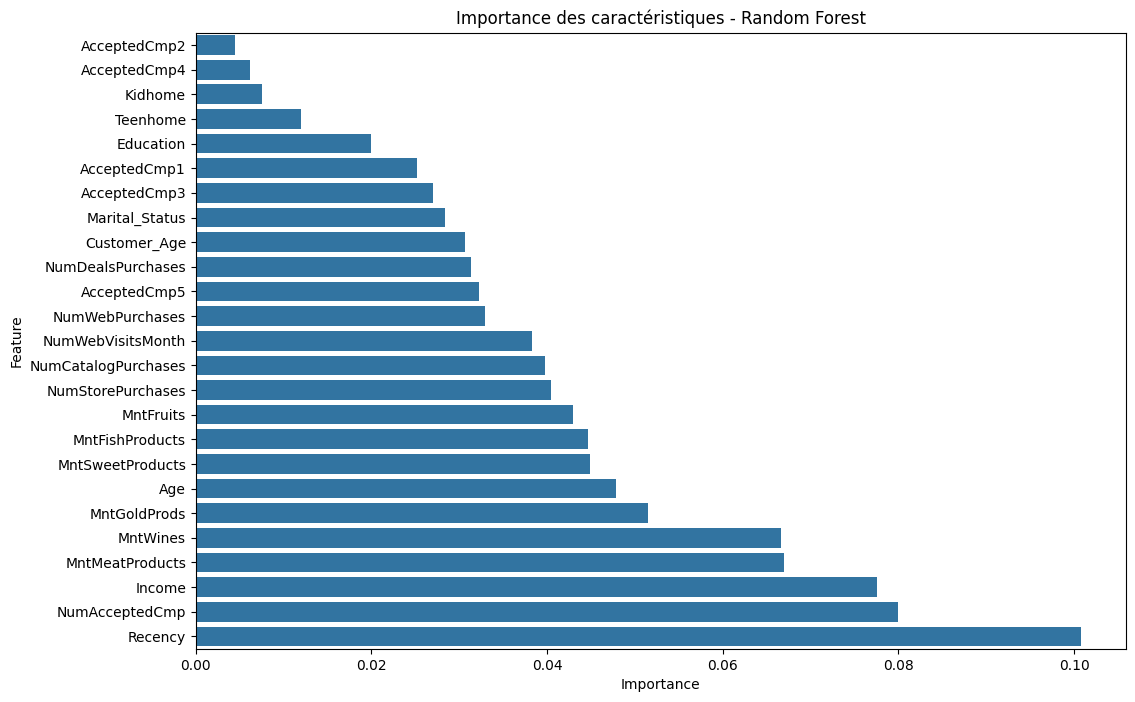


Importances des caractéristiques - Logistic Regression:
                Feature  Importance
5               Recency    0.881950
22         Customer_Age    0.734797
15    NumStorePurchases    0.596732
4              Teenhome    0.567044
8       MntMeatProducts    0.486697
0             Education    0.460365
16    NumWebVisitsMonth    0.395753
24       NumAcceptedCmp    0.393069
2                Income    0.367474
17         AcceptedCmp3    0.363765
14  NumCatalogPurchases    0.329313
6              MntWines    0.309137
12    NumDealsPurchases    0.281199
19         AcceptedCmp5    0.250285
1        Marital_Status    0.223569
20         AcceptedCmp1    0.203845
13      NumWebPurchases    0.185441
9       MntFishProducts    0.161117
18         AcceptedCmp4    0.159423
21         AcceptedCmp2    0.130199
11         MntGoldProds    0.115566
23                  Age    0.067816
7             MntFruits    0.065796
3               Kidhome    0.040405
10     MntSweetProducts    0.016058


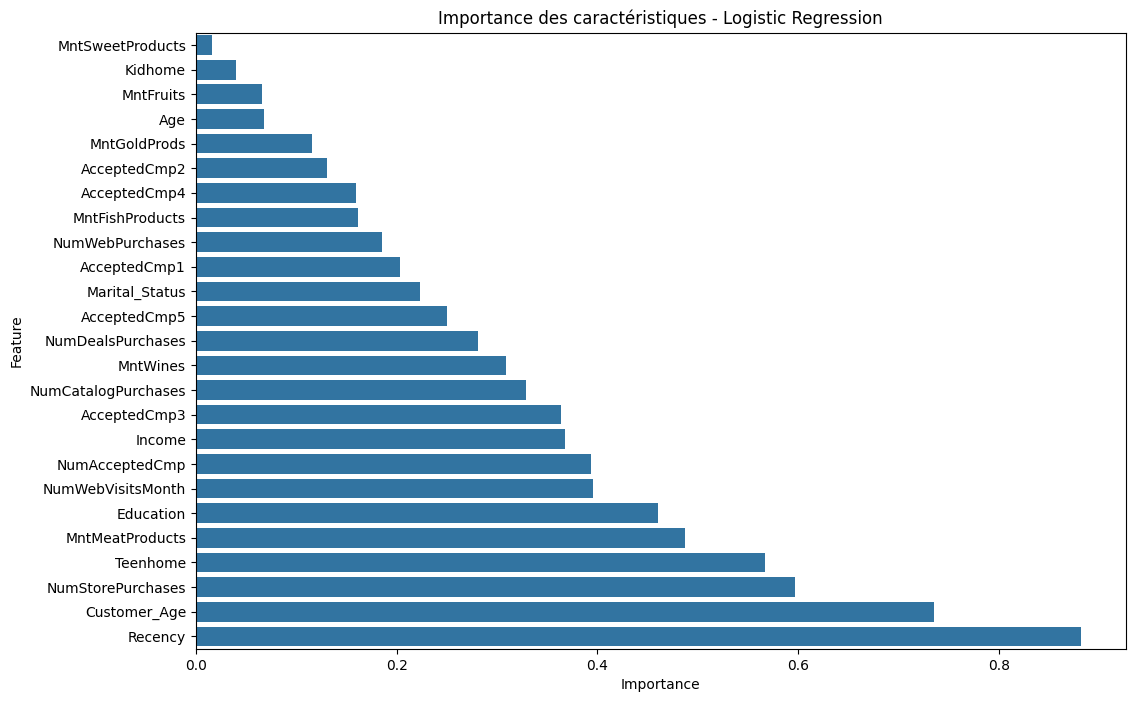


Importances des caractéristiques - SVM (linéaire):
                Feature  Importance
5               Recency    0.467915
15    NumStorePurchases    0.399139
22         Customer_Age    0.376306
4              Teenhome    0.281458
8       MntMeatProducts    0.270813
24       NumAcceptedCmp    0.235244
0             Education    0.229876
17         AcceptedCmp3    0.205002
2                Income    0.186418
19         AcceptedCmp5    0.182082
6              MntWines    0.171734
12    NumDealsPurchases    0.166278
14  NumCatalogPurchases    0.157369
20         AcceptedCmp1    0.141691
1        Marital_Status    0.133010
16    NumWebVisitsMonth    0.132587
10     MntSweetProducts    0.081254
18         AcceptedCmp4    0.068998
13      NumWebPurchases    0.064439
21         AcceptedCmp2    0.052332
7             MntFruits    0.046826
9       MntFishProducts    0.038809
23                  Age    0.038354
11         MntGoldProds    0.032203
3               Kidhome    0.023505


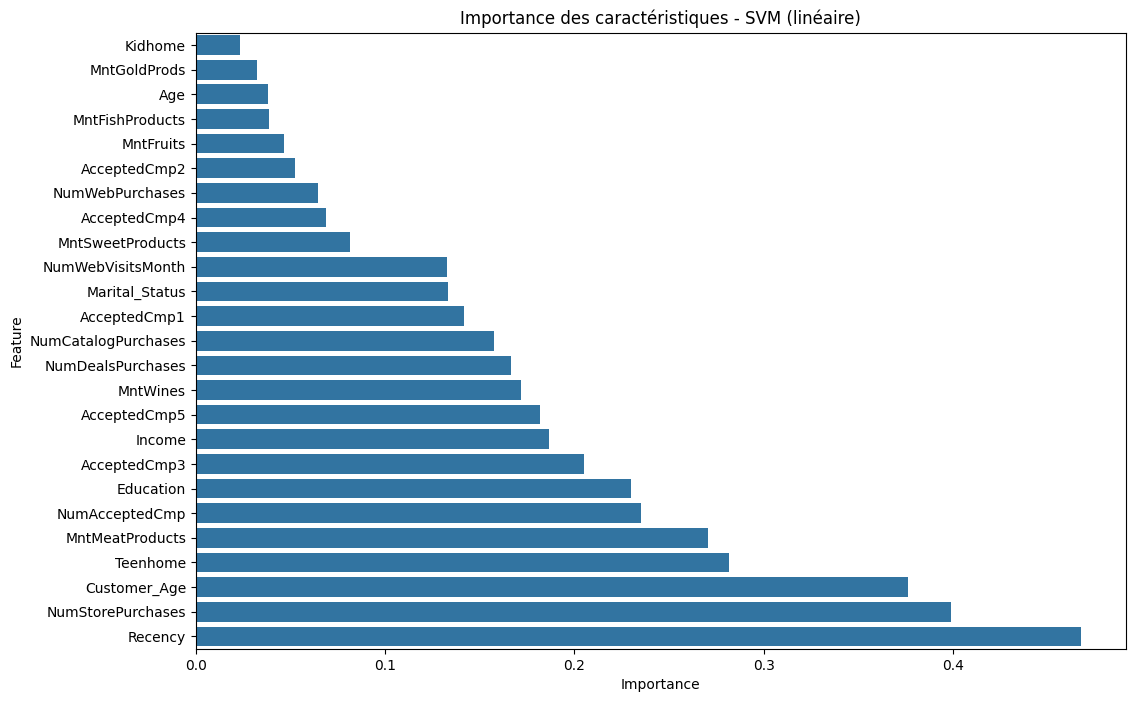

In [1273]:

# Charger le dataset
df = pd.read_csv('C:/Users/hamou/OneDrive/Bureau/Hackathon/net.csv')  # Lire le fichier CSV contenant les données dans un DataFrame

# Sélectionner toutes les colonnes pour le modèle, sauf la colonne cible 'Response'
X = df.drop(columns=['Response'])  # Sélectionner toutes les colonnes sauf 'Response' pour les caractéristiques
y = df['Response']  # Sélectionner la colonne 'Response' comme variable cible

# Standardiser les données (important pour les modèles SVM et Logistic Regression)
scaler = StandardScaler()  # Créer un objet StandardScaler pour normaliser les données
X_scaled = scaler.fit_transform(X)  # Appliquer la standardisation sur les caractéristiques

# --------------------- 3. Random Forest ---------------------
# Créer et entraîner le modèle Random Forest
rf = RandomForestClassifier(random_state=42)  # Initialiser un modèle RandomForestClassifier avec une graine aléatoire
rf.fit(X, y)  # Entraîner le modèle Random Forest avec les données X et la cible y

# Extraire les importances des caractéristiques du modèle Random Forest
importances_rf = rf.feature_importances_  # Extraire l'importance de chaque caractéristique du modèle

# Créer un DataFrame pour visualiser l'importance des caractéristiques
feature_importance_rf = pd.DataFrame({
    'Feature': X.columns,  # Utilisation des colonnes du DataFrame d'origine comme caractéristiques
    'Importance': importances_rf  # Les importances extraites du modèle
})

# Trier les caractéristiques par importance décroissante
feature_importance_rf = feature_importance_rf.sort_values(by='Importance', ascending=False)  # Trier les caractéristiques selon leur importance

# Afficher les importances des caractéristiques
print("\nImportances des caractéristiques - Random Forest:")  # Afficher un message pour indiquer le modèle
print(feature_importance_rf)  # Afficher le DataFrame des importances triées

# Visualiser l'importance des caractéristiques
plt.figure(figsize=(12, 8))  # Définir la taille de la figure pour les graphiques
sns.barplot(x='Importance', y='Feature', data=feature_importance_rf, orient='h')  # Créer un graphique à barres horizontales pour afficher l'importance des caractéristiques
plt.gca().invert_yaxis()  # Inverser l'axe Y pour que les valeurs les plus importantes apparaissent en haut
plt.xticks(rotation=0)  # Garder les labels des axes X à l'horizontale
plt.yticks(rotation=0)  # Garder les labels des axes Y à l'horizontale
plt.title('Importance des caractéristiques - Random Forest')  # Ajouter un titre au graphique
plt.show()  # Afficher le graphique

# --------------------- 1. Logistic Regression ---------------------
# Créer et entraîner le modèle Logistic Regression
logreg = LogisticRegression(random_state=42, max_iter=1000)  # Initialiser un modèle Logistic Regression
logreg.fit(X_scaled, y)  # Entraîner le modèle Logistic Regression sur les données standardisées

# Extraire les coefficients (les poids) pour l'importance des caractéristiques
importances_logreg = abs(logreg.coef_[0])  # Extraire les coefficients absolus pour chaque caractéristique

# Créer un DataFrame pour visualiser l'importance des caractéristiques
feature_importance_logreg = pd.DataFrame({
    'Feature': X.columns,  # Utilisation des colonnes du DataFrame d'origine comme caractéristiques
    'Importance': importances_logreg  # Les importances extraites des coefficients du modèle
})

# Trier les caractéristiques par importance décroissante
feature_importance_logreg = feature_importance_logreg.sort_values(by='Importance', ascending=False)  # Trier les caractéristiques selon leur importance

# Afficher les importances des caractéristiques
print("\nImportances des caractéristiques - Logistic Regression:")  # Afficher un message pour indiquer le modèle
print(feature_importance_logreg)  # Afficher le DataFrame des importances triées

# Visualiser l'importance des caractéristiques
plt.figure(figsize=(12, 8))  # Définir la taille de la figure pour les graphiques
sns.barplot(x='Importance', y='Feature', data=feature_importance_logreg, orient='h')  # Créer un graphique à barres horizontales
plt.gca().invert_yaxis()  # Inverser l'axe Y pour que les valeurs les plus importantes apparaissent en haut
plt.xticks(rotation=0)  # Garder les labels des axes X à l'horizontale
plt.yticks(rotation=0)  # Garder les labels des axes Y à l'horizontale
plt.title('Importance des caractéristiques - Logistic Regression')  # Ajouter un titre au graphique
plt.show()  # Afficher le graphique

# --------------------- 2. SVM (Support Vector Machine) ---------------------
# Créer et entraîner le modèle SVM avec noyau linéaire
svm = SVC(kernel='linear', random_state=42)  # Initialiser un modèle SVM avec noyau linéaire
svm.fit(X_scaled, y)  # Entraîner le modèle SVM sur les données standardisées

# Extraire les coefficients pour l'importance des caractéristiques
importances_svm = abs(svm.coef_[0])  # Extraire les coefficients absolus pour chaque caractéristique

# Créer un DataFrame pour visualiser l'importance des caractéristiques
feature_importance_svm = pd.DataFrame({
    'Feature': X.columns,  # Utilisation des colonnes du DataFrame d'origine comme caractéristiques
    'Importance': importances_svm  # Les importances extraites des coefficients du modèle SVM
})

# Trier les caractéristiques par importance décroissante
feature_importance_svm = feature_importance_svm.sort_values(by='Importance', ascending=False)  # Trier les caractéristiques selon leur importance

# Afficher les importances des caractéristiques
print("\nImportances des caractéristiques - SVM (linéaire):")  # Afficher un message pour indiquer le modèle
print(feature_importance_svm)  # Afficher le DataFrame des importances triées

# Visualiser l'importance des caractéristiques
plt.figure(figsize=(12, 8))  # Définir la taille de la figure pour les graphiques
sns.barplot(x='Importance', y='Feature', data=feature_importance_svm, orient='h')  # Créer un graphique à barres horizontales
plt.gca().invert_yaxis()  # Inverser l'axe Y pour que les valeurs les plus importantes apparaissent en haut
plt.xticks(rotation=0)  # Garder les labels des axes X à l'horizontale
plt.yticks(rotation=0)  # Garder les labels des axes Y à l'horizontale
plt.title('Importance des caractéristiques - SVM (linéaire)')  # Ajouter un titre au graphique
plt.show()  # Afficher le graphique
